# Advanced Machine Learning
## Exercise Sheet 3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

In [3]:
# Given values
p = 0.02  # probability of adverse side effects

# Range of n values (number of patients)
n_values = np.arange(50, 1001)

In [7]:
# Lists to store bounds and actual probability
chebyshev_bounds = []
hoeffding_bounds = []
actual_probs = []

for n in n_values:
    # Mean and variance of binomial distribution
    mu = n * p
    variance = n * p * (1-p)

    # Chebyshev's Inequality
    k = np.sqrt((n * p * (1-p)) / (50 - n*p))
    chebyshev_bound = min(1, 1/k**2)
    chebyshev_bounds.append(chebyshev_bound)

    # Hoeffding's Inequality
    epsilon = abs(50/n - p)
    hoeffding_bound = min(1, 2 * np.exp(-2 * n * epsilon**2))
    hoeffding_bounds.append(hoeffding_bound)

    # Actual probability using binomial CDF
    actual_prob = 1 - binom.cdf(49, n, p)  # P(X >= 50) = 1 - P(X <= 49)
    actual_probs.append(actual_prob)

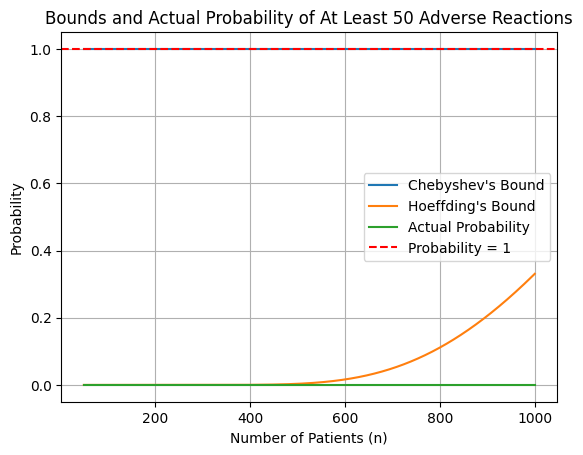

In [8]:
# Plotting
#plt.figure(figsize=(10, 6))
plt.plot(n_values, chebyshev_bounds, label="Chebyshev's Bound")
plt.plot(n_values, hoeffding_bounds, label="Hoeffding's Bound")
plt.plot(n_values, actual_probs, label="Actual Probability")
plt.axhline(y=1, color='r', linestyle='--', label="Probability = 1")
plt.xlabel('Number of Patients (n)')
plt.ylabel('Probability')
plt.title('Bounds and Actual Probability of At Least 50 Adverse Reactions')
plt.legend()
plt.grid(True)
plt.show()